In [ ]:
#Table of contents
#This includes data profiling, changing data types, wrangling, preforming consistency checks, merginng data, defining new variables, grouping, and visualizations

In [1]:
#Import programs
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
insta_data=pd.read_pickle(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 4/Instacart Basket Analysis 08-2022/02 Data/Prepared Data/ords_prods_grouped.pkl')

In [3]:
#addressing PII, we will take a brief look at the data to see if there is any PII info we need to inquire about
insta_data_head=insta_data.head()

In [4]:
insta_data.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', '_merge', 'aisle_id', 'department_id',
       'prices', 'gender', 'state', 'age', 'date_joined', 'children',
       'f_status', 'income', 'merge_flag_cust', 'max_order', 'loyalty_flag',
       'mean_orders', 'spender_flag', 'median_orders', 'frequency_flag'],
      dtype='object')

In [5]:
#It does list the customers gender, age, n_depdendents, and marital status but that can't identify anyone so we do not have a PII issue here

In [6]:
#Now we will split each state into one of four regions


In [7]:
insta_data.loc[(insta_data['state'] == 'Maine') | (insta_data['state'] == 'New Hampshire') | (insta_data['state'] == 'Vermont') | (insta_data['state'] == 'Massachusetts') | (insta_data['state'] == 'Rhode Island') | (insta_data['state'] == 'Connecticut') | (insta_data['state'] == 'New York') | (insta_data['state'] == 'Pennsylvania') | (insta_data['state'] == 'New Jersey'), 'region'] = 'Region One'



In [8]:
insta_data.loc[(insta_data['state'] == 'Wisconsin') | (insta_data['state'] == 'Michigan') | (insta_data['state'] == 'Illinois') | (insta_data['state'] == 'Indiana') | (insta_data['state'] == 'Ohio') | (insta_data['state'] == 'North Dakota') | (insta_data['state'] == 'South Dakota') | (insta_data['state'] == 'Nebraska') | (insta_data['state'] == 'Kansas')|(insta_data['state'] == 'Minnesota') | (insta_data['state'] == 'Iowa') | (insta_data['state'] == 'Missouri') , 'region'] = 'Region Two'



In [9]:
insta_data.loc[(insta_data['state'] == 'Delaware') | (insta_data['state'] == 'Maryland') | (insta_data['state'] == 'District of Columbia') | (insta_data['state'] == 'Virginia') | (insta_data['state'] == 'West Virginia') | (insta_data['state'] == 'North Carolina') | (insta_data['state'] == 'South Carolina') | (insta_data['state'] == 'Georgia') | (insta_data['state'] == 'Florida')|(insta_data['state'] == 'Kentucky') | (insta_data['state'] == 'Tennessee') | (insta_data['state'] == 'Mississippi') |(insta_data['state'] == 'Alabama') |(insta_data['state'] == 'Oklahoma') | (insta_data['state'] == 'Texas') | (insta_data['state'] == 'Arkansas') | (insta_data['state'] == 'Louisiana')  , 'region'] = 'Region Three'



In [10]:
insta_data.loc[(insta_data['state'] == 'Idaho') | (insta_data['state'] == 'Montana') | (insta_data['state'] == 'Wyoming') | (insta_data['state'] == 'Nevada') | (insta_data['state'] == 'Utah') | (insta_data['state'] == 'Colorado') | (insta_data['state'] == 'Arizona') | (insta_data['state'] == 'New Mexico') | (insta_data['state'] == 'Alaska')|(insta_data['state'] == 'Washington') | (insta_data['state'] == 'Oregon') | (insta_data['state'] == 'California') |(insta_data['state'] == 'Hawaii') , 'region'] = 'Region Four'



In [11]:
insta_data['region'].value_counts(dropna=False)

Region Three    10791885
Region Four      8292913
Region Two       7597325
Region One       5722736
Name: region, dtype: int64

In [12]:
#The next step will be to see if there is a difference in spending habits between the two regions:

In [24]:
insta_data['spender_flag'].value_counts(dropna=False)

High Spender    31771245
Low Spender       574311
NaN                59303
Name: spender_flag, dtype: int64

In [14]:
insta_data['mean_orders'].value_counts(dropna=False)

8.015625     159661
8.031250     157777
8.054688     156556
8.125000     155909
8.093750     155617
              ...  
20.000000         3
23.203125         3
2.333984          3
2.933594          3
12.703125         3
Name: mean_orders, Length: 3628, dtype: int64

In [17]:
prices_col=insta_data['prices']

In [20]:
prices_col.head()

0    11.296875
1    11.296875
2    11.296875
3    11.296875
4    11.296875
Name: prices, dtype: float16

In [22]:
prices_col.to_csv(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 4/Instacart Basket Analysis 08-2022/02 Data/Prepared Data/prices_col.csv',index=False)
                                   
                                   

In [23]:
insta_data['prices'] = insta_data['prices'].astype('float64')

In [26]:
insta_data.loc[insta_data['mean_orders'] > 10, 'spender_flag'] = 'Low Spender'
insta_data.loc[insta_data['mean_orders'] <= 10,'spender_flag'] = 'High Spender'


In [27]:
insta_data['spender_flag'].value_counts(dropna=False)

High Spender    31771245
Low Spender       574311
NaN                59303
Name: spender_flag, dtype: int64

In [29]:
insta_data['prices'].value_counts().sort_index()

1.000000e+00    115143
1.099609e+00    242782
1.200195e+00    256258
1.299805e+00    425691
1.400391e+00    392209
                 ...  
2.479688e+01       410
2.490625e+01      5781
2.500000e+01     13772
1.489600e+04      4429
inf                698
Name: prices, Length: 242, dtype: int64

In [35]:


insta_data['prices']= insta_data['prices'].replace([np.inf, -np.inf], "NaN")

In [38]:
insta_data['prices'].value_counts().sort_index()

1.000000        115143
1.099609        242782
1.200195        256258
1.299805        425691
1.400391        392209
                 ...  
24.703125         7283
24.796875          410
24.906250         5781
25.000000        13772
14896.000000      4429
Name: prices, Length: 241, dtype: int64

In [37]:
insta_data['prices'] = insta_data['prices'].astype("float64")

In [39]:
insta_data['prices'].fillna(insta_data['prices'].mean(), inplace = True)

In [40]:
insta_data['prices'].value_counts().sort_index()

1.000000        115143
1.099609        242782
1.200195        256258
1.299805        425691
1.400391        392209
                 ...  
24.703125         7283
24.796875          410
24.906250         5781
25.000000        13772
14896.000000      4429
Name: prices, Length: 242, dtype: int64

In [41]:
insta_data = insta_data.drop('mean_orders', axis=1)

In [42]:
insta_data = insta_data.drop('spender_flag', axis=1)

In [43]:
insta_data['mean_orders'] = insta_data.groupby(['user_id'])['prices'].transform(np.mean)

In [44]:
insta_data.loc[insta_data['mean_orders'] > 10, 'spender_flag'] = 'Low Spender'
insta_data.loc[insta_data['mean_orders'] <= 10,'spender_flag'] = 'High Spender'


In [45]:
insta_data['spender_flag'].value_counts(dropna=False)

High Spender    31828362
Low Spender       576497
Name: spender_flag, dtype: int64

In [46]:
#The reason I did all this above was because there was an error within the data, i had to take the inf data, turn it into nan and then replace it with the mean value of the rest of the data

In [47]:
#Now we can get back to seeing if there is a difference in spending habits between the two regions:

In [49]:
crosstab = pd.crosstab(insta_data['region'], insta_data['spender_flag'], dropna = False)


In [50]:
crosstab

spender_flag,High Spender,Low Spender
region,,
Region Four,8144851,148062
Region One,5623963,98773
Region Three,10602383,189502
Region Two,7457165,140160


In [51]:
#we can see that there is a big difference in spending habbits by region. Though, dividing by the amount of users in within each region might be a good idea!

In [66]:
insta_data.groupby('region')['state'].nunique()

region
Region Four     13
Region One       9
Region Three    17
Region Two      12
Name: state, dtype: int64

In [67]:
insta_data.groupby('region')['user_id'].nunique()

region
Region Four     52565
Region One      36388
Region Three    68737
Region Two      48519
Name: user_id, dtype: int64

In [68]:
#We see that region three has both more states and customers that the others which can account of it leading in numbers

In [69]:
#the following will be a sample of customers who do not generate enough revenue by the app, namely customers with less than 5 orders:

In [70]:
insta_high_activity_customers=insta_data[insta_data['order_number']>5]

In [71]:

insta_high_activity_customers.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', '_merge', 'aisle_id', 'department_id',
       'prices', 'gender', 'state', 'age', 'date_joined', 'children',
       'f_status', 'income', 'merge_flag_cust', 'max_order', 'loyalty_flag',
       'median_orders', 'frequency_flag', 'region', 'mean_orders',
       'spender_flag'],
      dtype='object')

In [72]:
#quick check to make sure we don't have anything 5 and under in our new sample:

insta_high_activity_customers.min()

/var/folders/xt/zrqk4mvj6cj4y973_7tp2_nw0000gp/T/ipykernel_34912/467650134.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  insta_high_activity_customers.min()


order_id                                  3
product_id                                1
add_to_cart_order                         1
reordered                                 0
user_id                                   1
eval_set                              prior
order_number                              6
order_dow                                 0
order_hour_of_day                         0
days_since_prior_order                  0.0
aisle_id                               -128
department_id                             1
prices                                  1.0
gender                               Female
state                               Alabama
age                                      18
date_joined                        1/1/2017
children                                  0
f_status                   divorced/widowed
income                                25903
max_order                                 6
loyalty_flag                 Loyal customer
median_orders                   

In [73]:
#exporting data
insta_high_activity_customers.to_pickle(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 4/Instacart Basket Analysis 08-2022/02 Data/Prepared Data/insta_high_activity_customers.pkl')

In [74]:
#deleteing high activity sample to reduce data usage
del insta_high_activity_customers

In [75]:
#We will now explore some data profiling based on different demographics whether it be familial or socioeconmic or based on age

In [79]:
#Age group profile, splitting given ages into three categories
insta_data.loc[insta_data['age']<=25,'age_group']='Young Adult'
insta_data.loc[(insta_data['age']>25) & (insta_data['age']<65),'age_group']='Regular Adult'
insta_data.loc[insta_data['age']>=65,'age_group']='Senior Citizen'

In [80]:
insta_data['age_group'].value_counts(dropna=False)

Regular Adult     19784586
Senior Citizen     8575084
Young Adult        4045189
Name: age_group, dtype: int64

In [81]:
#Income profile, splitting different incomes into three categories

In [84]:
insta_data['income'].min()

25903

In [85]:
insta_data['income'].max()

593901

In [90]:
insta_data.loc[insta_data['income']<50000,'income_level']='Low-Level Income'
insta_data.loc[(insta_data['income']>50000) &(insta_data['income']<150000),'income_level']='Mid-Level Income'
insta_data.loc[insta_data['income']>=150000,'income_level']='High-Level Income'

In [91]:
insta_data['income_level'].value_counts(dropna=False)

Mid-Level Income     24759195
High-Level Income     4051581
Low-Level Income      3594083
Name: income_level, dtype: int64

In [92]:
insta_data['department_id'].head()

0    16
1    16
2    16
3    16
4    16
Name: department_id, dtype: int8

In [93]:
#Importing and analyzing the departments data

In [94]:
dept=pd.read_csv(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 4/Instacart Basket Analysis 08-2022/02 Data/Prepared Data/departments_wrangled.csv',index_col=False)

In [95]:
dept.columns

Index(['Unnamed: 0', 'department'], dtype='object')

In [101]:
dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [107]:
insta_data['department_id'].value_counts(dropna=False)

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

In [109]:
#We see here the list of our most and least popular departments with frozen, other and bakery at the top and babies, snacks, and deli at the bottom


In [113]:
#We will look at how many of our customers have kids

In [111]:
insta_data.loc[insta_data['children']<=0,'parent_status']='Are Parents'
insta_data.loc[insta_data['children']>=1,'parent_status']='Are Not Parents'

In [112]:
insta_data['parent_status'].value_counts(dropna=False)

Are Not Parents    24307356
Are Parents         8097503
Name: parent_status, dtype: int64

In [114]:
#Pretty interesting that the vast majority of our customers don't have kids. 

In [115]:
#The following are visualizations based on the customer profiles made above:

Text(0, 0.5, 'Number of Customers(Billions)')

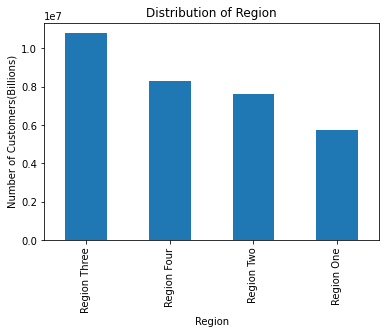

In [127]:
#Visualization of the different regions, one being one billion
insta_data['region'].value_counts().plot.bar(50)
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers(Billions)')

Text(0, 0.5, 'Number of Orders(Billions)')

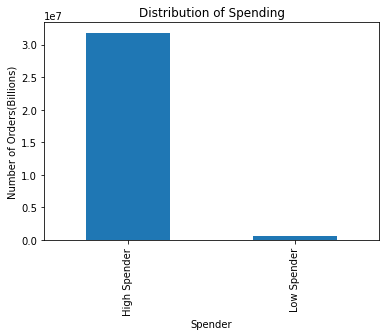

In [128]:
#Visualizations of the different spending habits, seemingly, those who buy from us do not stop buying. Which means our customer retention is very high
insta_data['spender_flag'].value_counts().plot.bar()
plt.title('Distribution of Spending')
plt.xlabel('Spender')
plt.ylabel('Number of Orders(Billions)')

Text(0, 0.5, 'Number of Customters(Billions)')

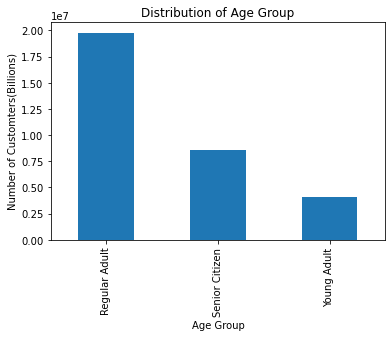

In [129]:
#Age group profile visualizations
insta_data['age_group'].value_counts().plot.bar()
plt.title('Distribution of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customters(Billions)')

Text(0, 0.5, 'Number of Customers(Billions)')

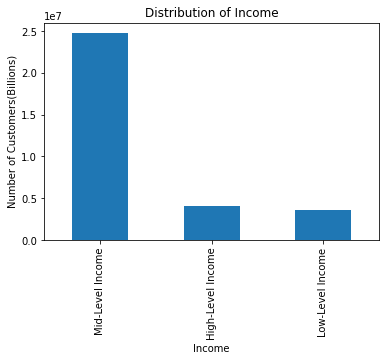

In [130]:
#Income level Profile visualizations
insta_data['income_level'].value_counts().plot.bar()
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Number of Customers(Billions)')

In [131]:
#We will now preform aggregations for usage frequency and expenditure

In [133]:
insta_data['prices'].head()

0    11.296875
1    11.296875
2    11.296875
3    11.296875
4    11.296875
Name: prices, dtype: float64

In [134]:
#First, region aggregations:

In [135]:
#Expenditure
insta_data.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
region                              
Region Four   9.775853  1.0  14896.0
Region One    9.702293  1.0  14896.0
Region Three  9.924897  1.0  14896.0
Region Two    9.832524  1.0  14896.0

In [136]:
#Frequency
insta_data.groupby('region').agg({'median_orders': ['mean', 'min', 'max']})

median_orders           
                      mean  min   max
region                               
Region Four      10.359375  0.0  30.0
Region One       10.375000  0.0  30.0
Region Three     10.398438  0.0  30.0
Region Two       10.460938  0.0  30.0

In [137]:
#Second, spender aggregations:

In [138]:
#Top spender expenditure
insta_data.groupby('spender_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                    mean  min      max
spender_flag                          
High Spender    7.780651  1.0     25.0
Low Spender   122.737526  1.0  14896.0

In [139]:
#Top spender frequency
insta_data.groupby('spender_flag').agg({'median_orders': ['mean', 'min', 'max']})

median_orders           
                      mean  min   max
spender_flag                         
High Spender     10.398438  0.0  30.0
Low Spender      10.171875  0.0  30.0

In [140]:
#Third, age group aggregations:

In [141]:
#Age group expenditure:
insta_data.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                    mean  min      max
age_group                             
Regular Adult   9.802556  1.0  14896.0
Senior Citizen  9.820885  1.0  14896.0
Young Adult     9.949783  1.0  14896.0

In [142]:
#Age group frequency
insta_data.groupby('spender_flag').agg({'median_orders': ['mean', 'min', 'max']})

median_orders           
                      mean  min   max
spender_flag                         
High Spender     10.398438  0.0  30.0
Low Spender      10.171875  0.0  30.0

In [143]:
#Lastly, income level aggregations:

In [144]:
#Income level expenditure
insta_data.groupby('income_level').agg({'prices': ['mean', 'min', 'max']})

prices              
                        mean  min      max
income_level                              
High-Level Income  20.275415  1.0  14896.0
Low-Level Income    6.696874  1.0     25.0
Mid-Level Income    8.570011  1.0  14896.0

In [145]:
#Income level frequency
insta_data.groupby('income_level').agg({'median_orders': ['mean', 'min', 'max']})

median_orders           
                           mean  min   max
income_level                              
High-Level Income     10.171875  0.0  30.0
Low-Level Income      11.125000  0.0  30.0
Mid-Level Income      10.328125  0.0  30.0

In [146]:
#We will now compare customer profiles with regions and departments and others to indentify patterns and links

In [148]:
#spender level across regions
sepender_region_crosstab = pd.crosstab(insta_data['region'], insta_data['spender_flag'], dropna = False)


In [149]:
sepender_region_crosstab

spender_flag,High Spender,Low Spender
region,,
Region Four,8144851,148062
Region One,5623963,98773
Region Three,10602383,189502
Region Two,7457165,140160


In [162]:
df_3=insta_data.groupby('region')['user_id'].nunique()

In [151]:
spender_region_ratio=pd.read_csv(r'/Users/hillelkrief1/Desktop/ratio.csv',index_col=False)

In [152]:
spender_region_ratio

,spender_flag,High Spender,Low Spender
0,Region Four,154.948178,2.816741
1,Region One,154.555430,2.714439
2,Region Three,154.245646,2.756914
3,Region Two,153.695769,2.888765


In [153]:
#ratio wise, spender levels across USA's four regions are very similar. Cumultive numbers wise we see that region three is number one. But you cannot say that one region majorly better than the other in this regard

In [154]:
#age group level across regions
age_group_crosstab = pd.crosstab(insta_data['region'], insta_data['age_group'], dropna = False)

In [155]:
age_group_crosstab

age_group,Regular Adult,Senior Citizen,Young Adult
region,,,
Region Four,5080955,2194080,1017878
Region One,3457721,1553903,711112
Region Three,6578963,2836257,1376665
Region Two,4666947,1990844,939534


In [156]:
age_group_ratio=pd.read_csv(r'/Users/hillelkrief1/Desktop/ratio1.csv',index_col=False)

In [157]:
age_group_ratio

,spender_flag,High Spender,Low Spender
0,Region Four,96.660420,41.740322
1,Region One,95.023662,42.703721
2,Region Three,95.712106,41.262450
3,Region Two,96.188029,41.032255


In [187]:
#income across regions
income_crosstab = pd.crosstab(insta_data['region'], insta_data['income_level'], dropna = False)

In [188]:
income_crosstab

income_level,High-Level Income,Low-Level Income,Mid-Level Income
region,,,
Region Four,1046633,908969,6337311
Region One,706788,627256,4388692
Region Three,1342212,1219460,8230213
Region Two,955948,838398,5802979


In [189]:
df_merge = income_crosstab.merge(df_3, on = 'region', indicator = True)

In [190]:
df_merge

,High-Level Income,Low-Level Income,Mid-Level Income,user_id,_merge
region,,,,,
Region Four,1046633,908969,6337311,52565,both
Region One,706788,627256,4388692,36388,both
Region Three,1342212,1219460,8230213,68737,both
Region Two,955948,838398,5802979,48519,both


In [191]:
df_merge['High Level Ratio'] = df_merge['High-Level Income']/df_merge['user_id']

In [192]:
df_merge['Low Level Ratio'] = df_merge['Low-Level Income']/df_merge['user_id']

In [193]:
df_merge['Mid Level Ratio'] = df_merge['Mid-Level Income']/df_merge['user_id']

In [194]:
df_merge

,High-Level Income,Low-Level Income,Mid-Level Income,user_id,_merge,High Level Ratio,Low Level Ratio,Mid Level Ratio
region,,,,,,,,
Region Four,1046633,908969,6337311,52565,both,19.911215,17.292286,120.561419
Region One,706788,627256,4388692,36388,both,19.423656,17.237991,120.608222
Region Three,1342212,1219460,8230213,68737,both,19.526776,17.740955,119.734830
Region Two,955948,838398,5802979,48519,both,19.702550,17.279787,119.602197


In [195]:
#again we have the same story, ratio wise everything is pretty similar across the board. Cul numbers wise region three and four are tops consistently

In [196]:
df_merge.drop('Low-Level Income', axis=1, inplace=True)

In [197]:
df_merge.drop('High-Level Income', axis=1, inplace=True)

In [198]:
df_merge.drop('user_id', axis=1, inplace=True)

In [199]:
df_merge.drop('_merge', axis=1, inplace=True)

In [200]:
df_merge.drop('Mid-Level Income', axis=1, inplace=True)

In [202]:
income_region=df_merge

Text(0.5, 0, 'Region')

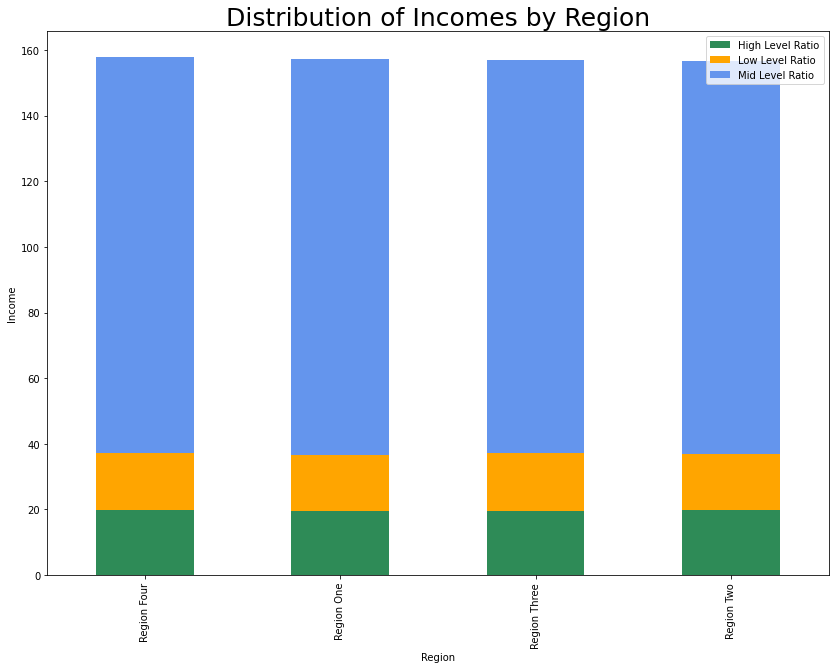

In [208]:
income_region_dist=income_region.plot(kind='bar', 
                        stacked=True, 
                        color=['seagreen','orange','cornflowerblue'], 
                        figsize=(14,10))
plt.title('Distribution of Incomes by Region', fontsize=25)
plt.ylabel('Income')
plt.xlabel("Region")

Text(0.5, 0, 'Region')

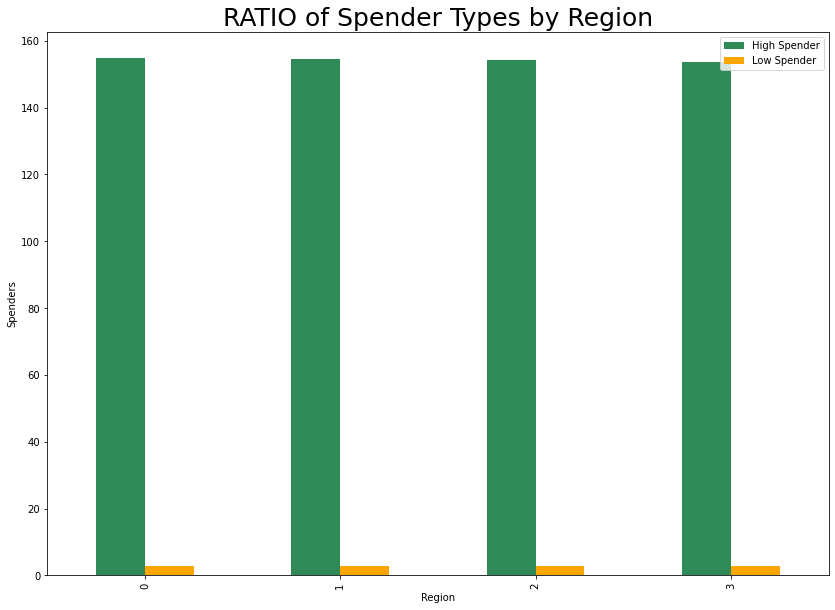

In [231]:
income_spender_dist_ratio=spender_region_ratio.plot(kind='bar', 
                        stacked=False, 
                        color=['seagreen','orange','cornflowerblue'], 
                        figsize=(14,10))
plt.title('RATIO of Spender Types by Region', fontsize=25)
plt.ylabel('Spenders')
plt.xlabel("Region")

Text(0.5, 0, 'Region')

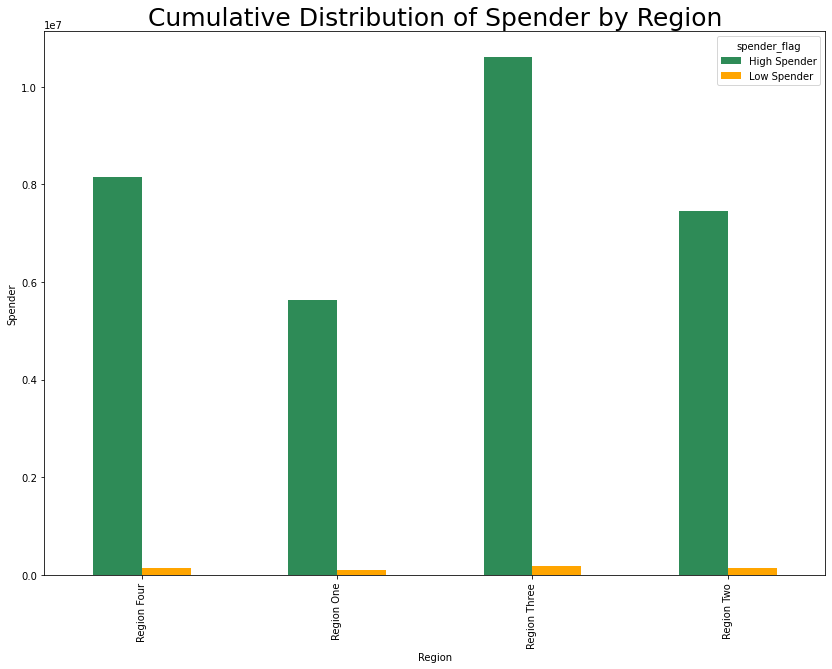

In [219]:
income_spender_dist=sepender_region_crosstab.plot(kind='bar', 
                        stacked=False, 
                        color=['seagreen','orange','cornflowerblue'], 
                        figsize=(14,10))
plt.title('Cumulative Distribution of Spender by Region', fontsize=25)
plt.ylabel('Spender')
plt.xlabel("Region")


In [215]:
parents_spenders_crosstab=pd.crosstab(insta_data['parent_status'], insta_data['spender_flag'], dropna = False)

In [216]:
parents_spenders_crosstab

spender_flag,High Spender,Low Spender
parent_status,,
Are Not Parents,23872513,434843
Are Parents,7955849,141654


Text(0.5, 0, 'Region')

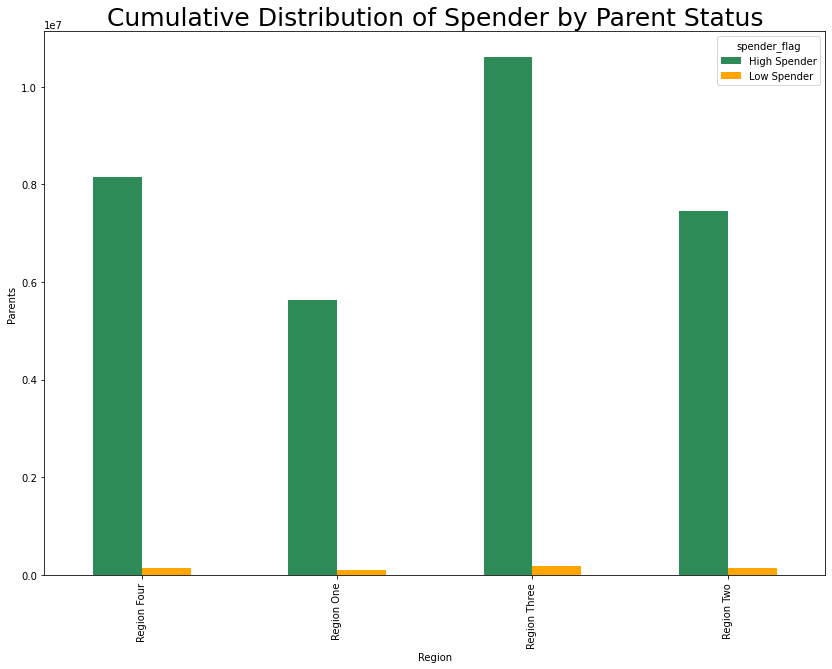

In [240]:
parents_spender_distribution=sepender_region_crosstab.plot(kind='bar', 
                        stacked=False, 
                        color=['seagreen','orange','cornflowerblue'], 
                        figsize=(14,10))
plt.title('Cumulative Distribution of Spender by Parent Status', fontsize=25)
plt.ylabel('Parents')
plt.xlabel("Region")


Text(0.5, 0, 'Age Group')

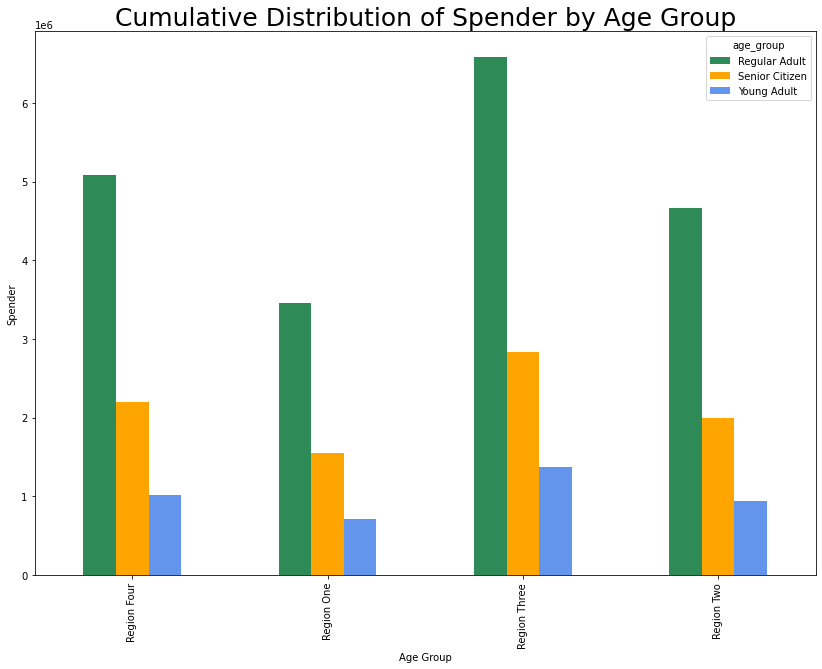

In [241]:
age_spender_distribution=age_group_crosstab.plot(kind='bar', 
                        stacked=False, 
                        color=['seagreen','orange','cornflowerblue'], 
                        figsize=(14,10))
plt.title('Cumulative Distribution of Spender by Age Group', fontsize=25)
plt.ylabel('Spender')
plt.xlabel("Age Group")


Text(0, 0.5, 'Number of Customers(Billions)')

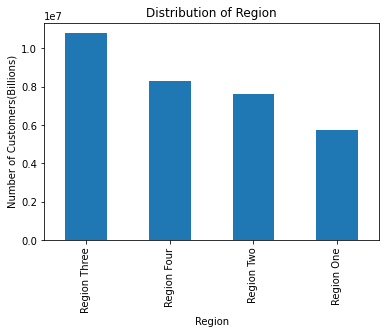

In [224]:
#Visualization of the different regions, one being one billion
region_viz=insta_data['region'].value_counts().plot.bar(50)
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers(Billions)')

Text(0, 0.5, 'Number of Orders(Billions)')

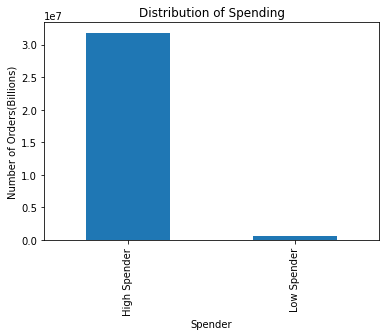

In [225]:
#Visualizations of the different spending habits, seemingly, those who buy from us do not stop buying. Which means our customer retention is very high
spending_viz=insta_data['spender_flag'].value_counts().plot.bar()
plt.title('Distribution of Spending')
plt.xlabel('Spender')
plt.ylabel('Number of Orders(Billions)')

Text(0, 0.5, 'Number of Customters(Billions)')

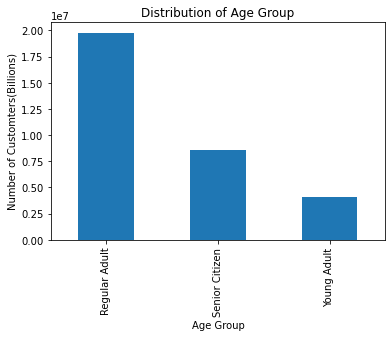

In [226]:
#Age group profile visualizations
age_group_viz=insta_data['age_group'].value_counts().plot.bar()
plt.title('Distribution of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customters(Billions)')

Text(0, 0.5, 'Number of Customers(Billions)')

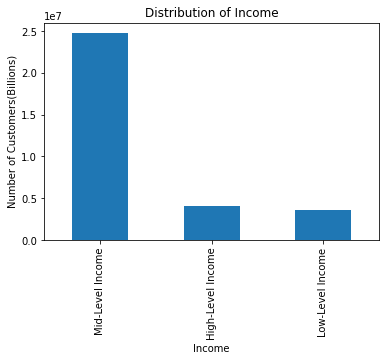

In [227]:
#Income level Profile visualizations
income_viz=insta_data['income_level'].value_counts().plot.bar()
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Number of Customers(Billions)')

In [228]:
income_region_dist.figure.savefig(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 4/Instacart Basket Analysis 08-2022/04 Analysis/Visualizations/income_by_region.png')


In [234]:
income_spender_dist_ratio.figure.savefig(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 4/Instacart Basket Analysis 08-2022/04 Analysis/Visualizations/region_by_spender_ratio.png')


In [235]:
income_spender_dist.figure.savefig(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 4/Instacart Basket Analysis 08-2022/04 Analysis/Visualizations/region_by_spender_cumulative.png')


In [243]:
parents_spender_distribution.figure.savefig(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 4/Instacart Basket Analysis 08-2022/04 Analysis/Visualizations/parents_spend.png')


In [245]:
age_spender_distribution.figure.savefig(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 4/Instacart Basket Analysis 08-2022/04 Analysis/Visualizations/parents_spend.png')


In [247]:
region_viz.figure.savefig(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 4/Instacart Basket Analysis 08-2022/04 Analysis/Visualizations/region.png')

In [248]:
spending_viz.figure.savefig(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 4/Instacart Basket Analysis 08-2022/04 Analysis/Visualizations/spending.png')

In [249]:
age_group_viz.figure.savefig(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 4/Instacart Basket Analysis 08-2022/04 Analysis/Visualizations/age_group.png')


In [250]:
income_viz.figure.savefig(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 4/Instacart Basket Analysis 08-2022/04 Analysis/Visualizations/income.png')

Text(0, 0.5, 'Number of Customers(Billions)')

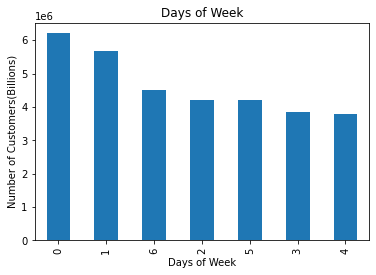

In [253]:
orders_dow=insta_data['order_dow'].value_counts().plot.bar()
plt.title('Days of Week')
plt.xlabel('Days of Week')
plt.ylabel('Number of Customers(Billions)')

In [254]:
orders_dow.figure.savefig(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 4/Instacart Basket Analysis 08-2022/04 Analysis/Visualizations/orders_dow.png')


In [255]:
insta_data['parent_status'].value_counts(dropna=False)

Are Not Parents    24307356
Are Parents         8097503
Name: parent_status, dtype: int64

In [258]:
region_parents_ct = pd.crosstab(insta_data['region'], insta_data['parent_status'], dropna = False)


Text(0, 0.5, 'Parents')

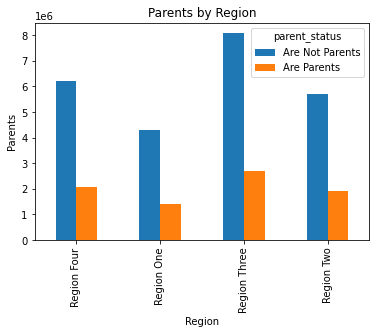

In [260]:
region_parents_viz=region_parents_ct.plot.bar()
plt.title('Parents by Region')
plt.xlabel('Region')
plt.ylabel('Parents')

In [263]:
region_parents_viz.figure.savefig(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 4/Instacart Basket Analysis 08-2022/04 Analysis/Visualizations/parents_region.png')
